In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need 
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, color='k', t_max=10.):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, color=color)
    plt.ylim(.5, len(event_times_list) + .5)
    ax.set_xlim((0,10))
    return ax

## Homework 1

Please, use your name as a part of the file name with answers. Upload your homeworks notebooks to ILIAS before 07.05 (later uploads might result in deduction). Problems 1.e, 2, 3 can go separatelly, preferably in LaTex (you can try Overleaf if not used to LaTeX before)

1) Take interval [0,10 sec]. We will simulate spikes within this interval to form a Poisson spike train. To do so we are going to use exponenetial distribution for inter-spike intervals. First spike-time (relative to time 0) is drawn from the exponential distribution with parameter $\tau$ , thus $t_1 \sim Exp(\tau) = 1/\tau e^{-t_1/\tau}$. All subsequent spikes are determined relative to the previous via $t_{k+1} = t_k + \Delta t$ with $\Delta t \sim Exp(\tau)$. Stop when the new spike-time exceed 10 sec. (1.5 points per each sub-task, tasks with a "*" give additional points)

a) Plot one spike train for each of the following parameter values: $\tau = 1$sec, $\tau = 0.1$sec, $\tau = 0.01$sec  

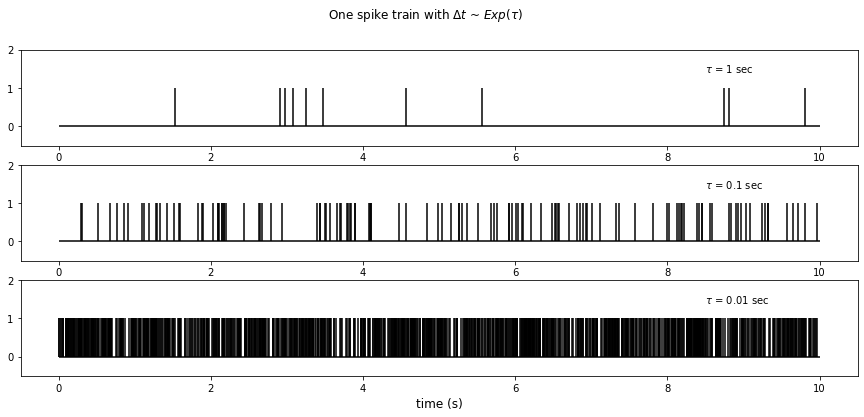

In [3]:
def spike_train_generator(tau, time):
# tau: scalar, parameter used for exponential distribution
# time: scalar, [0, time] is the time interval to simulate spike train
#
# spikes: list of timestamps for the simulated spike train

    t=0
    spikes=[]
    while t <= time:
        ISI = np.random.exponential(scale=tau)  #inter-spike interval
        t += ISI
        spikes.append(t)
    spikes.pop()  # pop off the last spike time 

    return spikes


tau = [1,0.1,0.01]
result = []
for i in range(0,len(tau)):
    spikes = spike_train_generator(tau[i], time=10)
    result.append(spikes)

plt.figure(figsize=(15,6))        
idx_plot = 1
for i in range(0,len(tau)):
    plt.subplot(3,1,idx_plot)
    plt.hlines(0,0,10)
    plt.vlines(result[i],0,1)
    plt.ylim([-0.5,2])
    plt.text(8.5,1.4, r'$\tau$ = '+ f"${str(tau[i])}$ sec", fontsize=10)
    idx_plot += 1
    
    plt.xlabel('time (s)',fontsize=12)
    plt.suptitle(r'One spike train with $\Delta t$ ~ $Exp(\tau)$')
    


b) Simulate 100.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance.

In [4]:
N=100000
tau = [1,0.1,0.01]
result=[]
for i in range(0,len(tau)):
    numSpikes=[]
    for j in range(0,N):
        spikes = spike_train_generator(tau[i], time=10)
        numSpikes.append(len(spikes))
    result.append(numSpikes)
    

The histogram plot shows the distribution of spike counts for each tau, with mean and one standard deviation.


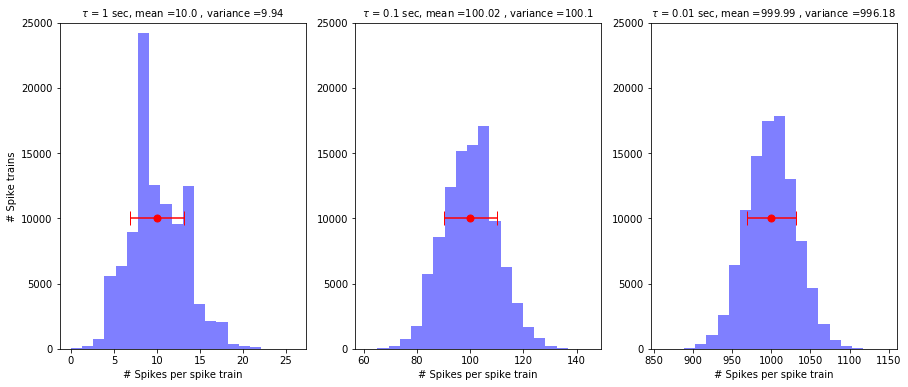

In [5]:
plt.figure(figsize=(15,6))        
idx_plot = 1
for i in range(0,len(tau)):
    plt.subplot(1,3,idx_plot)
    num_bins = 20
    plt.hist(result[i], num_bins, facecolor='blue', alpha=0.5)
    mean = np.mean(result[i])
    std = np.std(result[i])
    var = np.var(result[i])
    plt.errorbar(x=mean,y=10000,xerr=std, marker='o', c='r', ms=7,capsize = 7)
    plt.ylim([0,25000])
    plt.xlabel('# Spikes per spike train')
    if i == 0:
        plt.ylabel('# Spike trains')
    plt.title(r'$\tau$ = '+ f"${str(tau[i])}$ sec, mean =" 
              + f"${str(round(mean,2))}$ , variance =" 
              + f"${str(round(var,2))}$", fontsize=10)
    idx_plot += 1
    
print('The histogram plot shows the distribution of spike counts for each tau, with mean and one standard deviation.')

c) Draw 10.000 samples $x_k \in \{0, 1\}$ independently from a Beronulli distribution $P (x_k ) = \lambda^{x_k} (1 − \lambda)^{1−x_k}$ with $k = 1, \ldots , 10.000$ for the following three cases: $\lambda = 0.1$, $\lambda = 0.01$, $\lambda = 0.001$. Plot the random vector $x$ as a spike train for each of the three conditions.

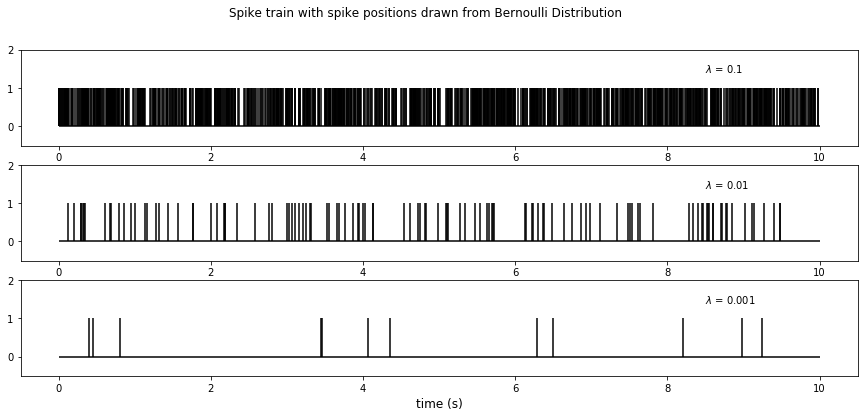

In [6]:
def spike_train_generator2(p,N,T):
# p : scalar, probability of success
# N : scalar, total number of samples
# T : time interval for the simulated spike train
#
# spikes: list of timestamps for the simulated spike train

    temp = np.random.binomial(n=1, p=p, size=N)  # list of 1s and 0s
    spikes = temp.nonzero()[0] /N *T  # find the index for nonzeros, normalize to the range of [0,10] 
    
    return spikes


# Main
numSamples=10000
T=10  # [0,10s]
lambdas=[0.1,0.01,0.001]
result=[]
for i in range(0,len(lambdas)):
    spikes = spike_train_generator2(lambdas[i],numSamples,T)
    result.append(spikes)
    
# plot
plt.figure(figsize=(15,6))        
idx_plot = 1
for i in range(0,len(lambdas)):
    plt.subplot(3,1,idx_plot)
    plt.hlines(0,0,10)
    plt.vlines(result[i],0,1)
    plt.ylim([-0.5,2])
    plt.text(8.5,1.4, r'$\lambda$ = '+ f"${str(lambdas[i])}$", fontsize=10)
    idx_plot += 1
    
    plt.xlabel('time (s)',fontsize=12)
    plt.suptitle('Spike train with spike positions drawn from Bernoulli Distribution')



d) Simulate 100.000 spike trains for each parameter in c) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance. How do the results differ from those b)?

In [7]:
N=100000
numSamples=10000
T=10  # [0,10s]
lambdas=[0.1,0.01,0.001]
result=[]
for i in range(0,len(lambdas)):
    numSpikes=[]
    for j in range(0,N):
        spikes = spike_train_generator2(lambdas[i],numSamples,T)
        numSpikes.append(len(spikes))
    result.append(numSpikes)
    

The histogram plot shows the distribution of spike counts for each tau, with mean and one standard deviation.


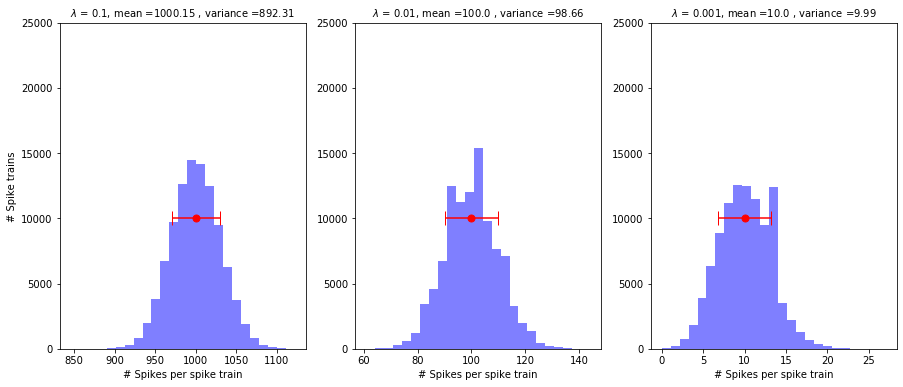

In [8]:
plt.figure(figsize=(15,6))        
idx_plot = 1
for i in range(0,len(lambdas)):
    plt.subplot(1,3,idx_plot)
    num_bins = 25
    plt.hist(result[i], num_bins, facecolor='blue', alpha=0.5)
    mean = np.mean(result[i])
    std = np.std(result[i])
    var = np.var(result[i])
    plt.errorbar(x=mean,y=10000,xerr=std, marker='o', c='r', ms=7,capsize = 7)
    plt.ylim([0,25000])
    plt.xlabel('# Spikes per spike train')
    if i == 0:
        plt.ylabel('# Spike trains')
    plt.title(r'$\lambda$ = '+ f"${str(lambdas[i])}$, mean =" 
              + f"${str(round(mean,2))}$ , variance =" 
              + f"${str(round(var,2))}$", fontsize=10)
    idx_plot += 1
    
print('The histogram plot shows the distribution of spike counts for each tau, with mean and one standard deviation.')

The histogram for $\lambda$ = 0.001 looks similar to that of $\tau$ = 1 sec in part b, same with $\lambda$ = 0.01 and $\tau$ = 0.1 sec, and $\lambda$ = 0.1 and $\tau$ = 0.01 sec. They all have similar means. The subtle difference is : For the same 100000 spike trains simulated, the variance is close to mean for each condition in part b (Poisson), while in part d (Binomial), the variance is smaller than mean . 

e*) How does it relate to the limit cases discussed in the lecture? Elaborate

inspirations from: https://www.le.ac.uk/users/dsgp1/COURSES/LEISTATS/poisson.pdf

$
\begin{align*}
\text{Take the binomial probability mass function: }\\
\end{align*}
$

$
\begin{align*}
b (x; n, \lambda) &= \frac{n!}{(n-x)!(x)!} \, \lambda^x (1-\lambda)^{n-x} \quad, \mu = n \lambda\\
&=\frac{n!}{(n-x)!(x)!} \, \big( \frac{\mu}{n} \big)^x \,  \big( 1 - \frac{\mu}{n} \big)^{n-x}\\
&=\frac{\mu^x}{x!} \, \frac{n!}{(n-x)!n^x} \, \big( 1 - \frac{\mu}{n} \big)^{n}
\big( 1 - \frac{\mu}{n} \big)^{-x} \\
\end{align*}
$

$
\begin{align*}
\lim_{n\to\infty} \, \frac{n!}{(n-x)!n^x} &= \lim_{n\to\infty} \, \frac{n(n-1)\cdots(n-x+1)}{n^x}\\
&= \lim_{n\to\infty} \, 1 \cdot \big(1-\frac{1}{n}\big) \cdots \big(1-\frac{x-1}{n}\big) = 1
\end{align*}
$

$
\begin{align*}
\lim_{n\to\infty} \big(1-\frac{\mu}{n}\big)^{-x}=1
\end{align*}
$

$
\begin{align*}
\lim_{n\to\infty} \big(1-\frac{\mu}{n}\big)^{n}= \lim_{n\to\infty} e^{n\ln\big(1-\frac{\mu}{n}\big)}
\end{align*}
$

$
\begin{align*}
\lim_{n\to\infty} n\ln\big(1-\frac{\mu}{n}\big) &= \lim_{n\to\infty} \frac{\ln\big(1-\frac{\mu}{n}\big)}{\frac{1}{n}}\\
&=\lim_{n\to 0} \frac{\ln\big(1-\mu n\big)}{n} \quad ,\text{(L'hospital Rule)}\\
&=\lim_{n\to 0} \frac{-\mu}{1-\mu n} = -\mu
\end{align*}
$

$
\begin{align*}
\therefore \lim_{n\to\infty} \big(1-\frac{\mu}{n}\big)^{n}= e^{-\mu}
\end{align*}
$

$
\begin{align*}
\therefore \lim_{n\to\infty}b (x; n, \lambda) = \frac{\mu^x e^{-\mu}}{x!} = Pois \, (\mu), \\
\end{align*}
$



This means for fixed $\mu$, Binomial distribution approaches Poisson distribution as the sample number grows to infinity.

For part d, the number of independent trials per spike train is 10000, and this large sample number also contributes to the similarities in histogram results between part b and d. 

Also, for X ~ Pois($\mu$), $\sigma_x^2 = \mu_x$, thus the variance is similar to the mean for histograms in part b. 
For X ~ B(n,$\lambda$), $\mu_x = n\lambda,\, \sigma_x^2 = n\lambda(1-\lambda) = \mu_x(1-\lambda)$, thus the variance will be closer to the mean for smaller $\lambda$.

2) Compute the mean and variance of the Poisson distribution with parapmeter $\lambda$ (first try yourself) (3 points)

$
\begin{align*}
\text{Poisson distribution:} \,
\Pr \, ( X=x ) = \frac{\lambda^x e^{-\lambda}}{x!} \quad (\text{for } \, x=0,1,2,...)\\
\end{align*}
$

$
\begin{align*}
\text{Calculate mean:}\\
\end{align*}
$

$
\begin{align*}
\mathbb{E}[X] &= \sum_{x=0}^{\infty} x \frac{\lambda^x e^{-\lambda}}{x!}\\
&= e^{-\lambda} \sum_{x=1}^{\infty} x \frac{\lambda^x}{x!}\\
&= \lambda e^{-\lambda} \sum_{x=1}^{\infty} \frac{\lambda^{x-1}}{(x-1)!}\\
&= \lambda e^{-\lambda} \sum_{x=0}^{\infty} \frac{\lambda^x}{x!}
\quad \big( \text{Taylor Series for } e^x \, \text{at } a=0, e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}  \big)\\
&= \lambda e^{-\lambda} e^{\lambda} = \lambda
\end{align*}
$

$
\begin{align*}
\text{Calculate variance:}\\
\end{align*}
$

$
\begin{align*}
Var[X] &= \mathbb{E} \Big[ \big( X - \mathbb{E}[X] \big)^2 \Big]\\
&= \mathbb{E}[X^2] - \big( \mathbb{E}[X] \big)^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[X(X-1)] &= \sum_{x=0}^{\infty} x(x-1) \frac{\lambda^x e^{-\lambda}}{x!}\\
&= e^{-\lambda} \sum_{x=2}^{\infty} x(x-1) \frac{\lambda^x}{x!}\\
&= \lambda^2 e^{-\lambda} \sum_{x=2}^{\infty} \frac{\lambda^{x-2}}{(x-2)!}\\
&= \lambda^2 e^{-\lambda} \sum_{x=0}^{\infty} \frac{\lambda^x}{x!}
\quad \big( \text{Taylor Series for } e^x \, \text{at } a=0, e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}  \big)\\
&= \lambda^2 e^{-\lambda} e^{\lambda} = \lambda^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[X(X-1)]=\mathbb{E}[X^2]-\mathbb{E}[X]
\end{align*}
$

$
\begin{align*}
\Rightarrow \mathbb{E}[X^2] = \lambda^2 + \lambda 
\end{align*}
$

$
\begin{align*}
Var[X] &= \mathbb{E}[X^2] - \big( \mathbb{E}[X] \big)^2\\
&=\lambda^2 + \lambda -\lambda^2 = \lambda
\end{align*}
$

3) Show that the sum of two independent Poisson random variables of parameters $\lambda$ and $\mu$ is again Poisson with
parameter $\lambda + \mu $. (2 points)

$
\begin{align*}
X \sim Pois \, (\lambda)\\
Y \sim Pois \, (\mu)
\end{align*}
$

$
\begin{align*}
Z=X+Y \quad X, Y \text{ are two independent Poisson random variables}
\end{align*}
$

$
\begin{align*}
\Pr \, (Z=z) &= \sum_{i=0}^{z} P(X=i) \, P(Y=z-i)\\
&= \sum_{i=0}^{z} \frac{\lambda^i e^{-\lambda}}{i!} \, \frac{\mu^{z-i} e^{-\mu}}{(z-i)!}\\
&= \sum_{i=0}^{z} \frac{z!}{i!(z-i)!} \, \frac{\lambda^i e^{-\lambda} \mu^{z-i} e^{-\mu}}{z!}\\
&= \frac{e^{-(\lambda + \mu)}}{z!} \, \sum_{i=0}^{z} \binom{z}{i} \, \lambda^i \mu^{z-i}
\quad ( \, \text{Binomial Theorem })\\
&= \frac{e^{-(\lambda + \mu)}}{z!} \, (\lambda + \mu)^z\\
&= \frac{(\lambda + \mu)^z \, e^{-(\lambda + \mu)}}{z!}
\end{align*}
$

$
\begin{align*}
\therefore \, Z \sim Pois \, (\lambda + \mu)
\end{align*}
$